In [9]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 可行的思路：
# 时间发生值取最高值作为参数，每个卫星提取1个
# 截断得整个伽马暴的有效时长（思路：参考衍射的半角宽/斜率最大）
# 对有效时长内的伽马暴求和算平均能谱

In [4]:
with h5py.File('data/Spectrum.h5', 'r') as ipt:
    print(ipt.keys())
    Spec = ipt['Spectrum'][...]

<KeysViewHDF5 ['Spectrum']>


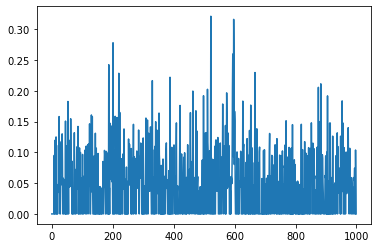

In [88]:
light_curve = Spec[:, 1]
T = np.arange(1000)

plt.plot(T, light_curve)

In [76]:
def cal_density(id_time, virgin_curve, sigma=1):
    '''
    移植来源：PID2,time_sequence.ipynb
    '''
    _Time = np.arange(virgin_curve.size)
    return np.sum(np.exp(- ((np.expand_dims(id_time, 1) - _Time) ** 2) / (2 * (sigma ** 2))) / \
                  (np.sqrt(2 * np.pi) * sigma) * \
                    np.expand_dims(light_curve, 0), axis=1)

In [64]:
# 调试部分
_Time = np.arange(light_curve.size)
id_time = np.array([1,2,3])
sigma = 1
np.sum(np.exp(- ((np.expand_dims(id_time, 1) - _Time) ** 2) / (2 * (sigma ** 2))) \
                  / (2 * np.pi * sigma) * np.expand_dims(light_curve, 0), axis=1)

array([0.03914906, 0.032347  , 0.02626108])

68.22390045563519
67.72737238991165


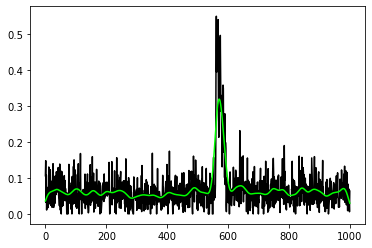

In [109]:
light_curve = Spec[:, 0]

light_curve_plus = cal_density(T, light_curve, 10)


plt.plot(T, light_curve, 'black')
plt.plot(T, light_curve_plus, 'lime')
print(light_curve.sum())
print(light_curve_plus.sum())

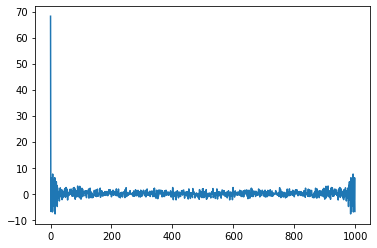

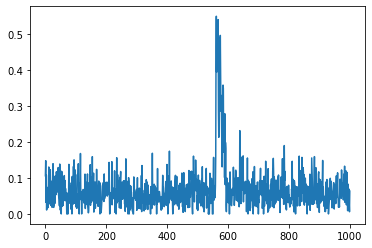

In [110]:
four_curve = np.fft.fft(light_curve)
plt.plot(T, four_curve)
plt.show()

res = np.fft.ifft(four_curve).real
plt.plot(T, res)

1000


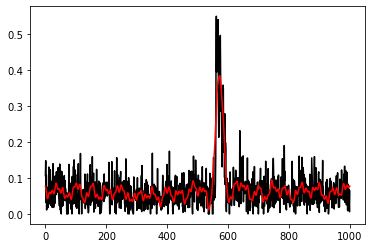

In [150]:
light_curve = Spec[:, 0]

level_rate = 0.3

four_curve = np.fft.fft(light_curve)
four_curve_abs = np.abs(four_curve)
four_abs_level = max(four_curve_abs[1:]) * level_rate
four_curve[four_curve_abs < four_abs_level] = 0

print(four_curve.size)

# plt.plot(T, four_curve)
# plt.show()

light_curve_plus = np.fft.ifft(four_curve).real
plt.plot(T, light_curve, 'black')
plt.plot(T, light_curve_plus, 'r')

In [169]:
import denoise
import imp
imp.reload(denoise)
import denoise as dn

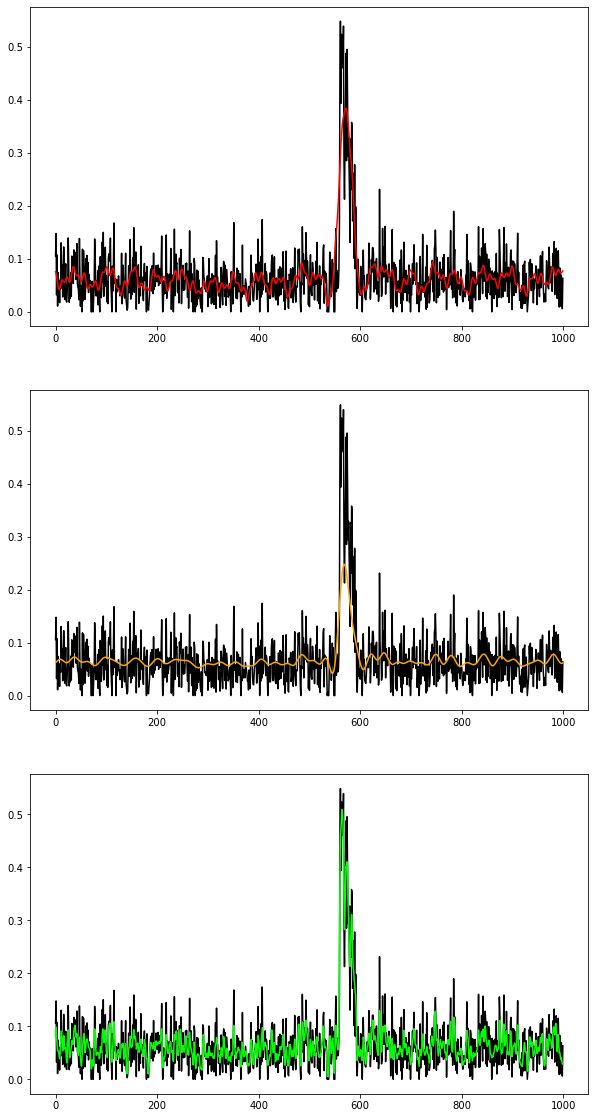

In [190]:
fig, axs = plt.subplots(3, figsize=(10,20))

axs[0].plot(T, Spec[:, 0], 'black')
axs[0].plot(T, dn.denoise_curve_by_fft(Spec[:,0]), 'red')

axs[1].plot(T, Spec[:, 0], 'black')
axs[1].plot(T, dn.denoise_curve_by_fft(Spec[:,0], method='number', freq_num=40), 'orange')

axs[2].plot(T, Spec[:, 0], 'black')
axs[2].plot(T, dn.denoise_curve_by_gauss(Spec[:,0]), 'lime')


In [167]:
def prt(a='1', b=2):
    print(a)
    print(b)

In [168]:
prt(b=3)

1
3
